1.1 ) First we must derive equation 4 from equation 3 using variable substitution and the conservation law. Rescaling, let S(t) = $\alpha \hat{S}$ where $\alpha = 1/τκ$ and let I(t) = $\beta \hat{I}$ where $\beta = κ$. Now when we substitute these into the equations, we get $D̂Ŝ = -τ/τκŜκÎ, D̂Î = τ/τκŜκÎ - κ/κÎ, and D̂R̂ = κ/κÎ$. These can be simplified to $D̂Ŝ = -ŜÎ, D̂Î = ŜÎ - Î$ by cancelling out tau and kappa. We can also get rid of the $D̂R̂$ because it can be calculated from the other two thus making it redundant. Lastly, we can rearrange $D̂Î = ŜÎ - Î = (Ŝ - 1)Î$. The domain of $Ŝ$ was [0, 1] and will now be $[0, 1/(τκ)]$ after we multiplied S(s) by $\alpha = 1/(τκ)$. The domain of $Î$ was [0, 1] and will now be $[0, \kappa]$ after we multiplied I(s) by $\beta = κ$.

1.2) The fixed points of the system can be found when both $D̂Ŝ and D̂Î = 0$. For this system of equations that is only true when $Î = 0$ regardless of what $Ŝ$ is. So, the fixed points are the line $(Ŝ, 0)$. The jacobean is [[-I, -S], [I, S-1]] and when we plug in our fixed points and find our eigenvalues by taking the determinant, we get $-λ(S-1-λ)$ where $0 ≼ S ≼ 1/(τκ)$. So, we know that one eigenvalue is 0 and the other will be S-1. If S is less than 1 (which it will always be if $τκ$ > 1) then the point will be unstable as there will be a positive eigenvalue, if S = 0 then both eigenvalues are zero so it is really degenerate, and if S > 1 then we will have 0 and a negative number as the eigenvalues and it will have stable adjacent behavior.

1.3 )

In [ ]:
import numpy as np
tau = 0.8
kappa = 4
s0 = 0.99
i0 = 0.01
r0 = 0
x0 = [s0, i0, r0]
i_stop = 10**(-4)
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def f(t, x):

    S, I, R = x
    dSdt = -tau * S * I
    dIdt = tau * S * I - (I / kappa)
    dRdt = I / kappa

    #print([dSdt, dIdt, dRdt])
    return [dSdt, dIdt, dRdt]


In [ ]:
def terminate(t, x):
  S, I, R = x
  #print(t)
  #print(x)
  return I - 10**(-4)

In [ ]:
tau = 0.8
kappa = 4
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]

51.4342895263509

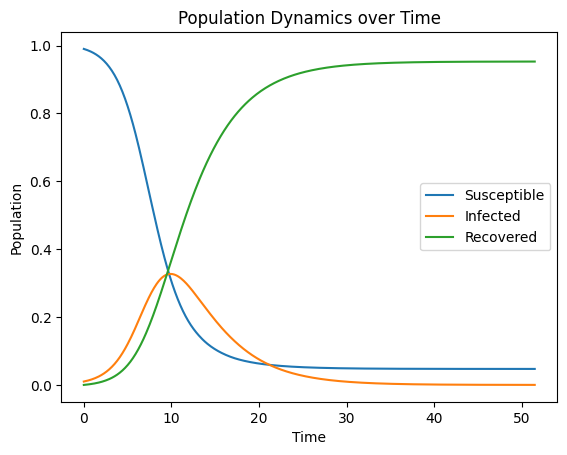

In [ ]:
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

In [ ]:
tau = 0.4
kappa = 4
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]

95.66377585056703

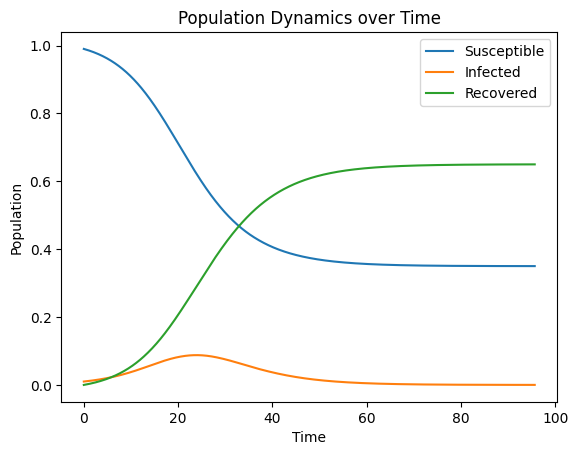

In [ ]:
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

In [ ]:
tau = 0.8
kappa = 8
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]

81.8545697131421

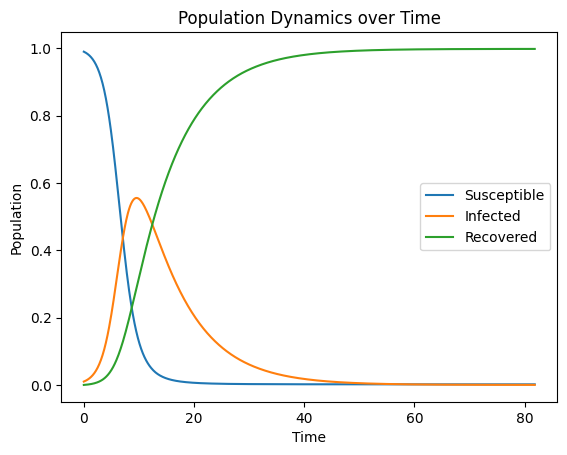

In [ ]:
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

Now we must summarize our observations across the three different plots. First the plot where tau = 0.8 and kappa = 4, the stopping time was 51.434 and the peak percentage of infected people was right around 30 percent at time = 10. For the plot where tau = 0.4 and kappa = 4, the stopping time was 95.66, and the peak was much lower at right around 10 percent of the population infected at time = 22. Lastly, the third plot had tau = 0.8 and kappa = 8, and in this case, the stopping time was 81.85, and the peak was much taller and earlier at nearly 60 percent of the population being infected at time = 10.
Something else that we can look at is the amount of people who were infected in total. This can be done by looking at what percentage of the people had recovered by the stopping time as that is when there is an insignificant amount of people still sick. Going in the same order of the graphs, in the first one, we notice that nearly the whole population became sick as the recovered percent gets nearly to the top of the graph, however by looking at the amount of susceptible people left, we can see that it is solidly above the number of infected people, and there are still about 5 percent that are susceptible meaning not everyone got sick which is good. In the second case, We see that only about 60-65 percent of the population got infected. In the final scenario, we see the infected and susceptible graphs converge right at the bottom meaning nearly everyone if not everyone got sick.

I think that I somewhat already interpreted them qualitatively, but I will try to do it again. In the first case, we have a diesese which spreads quickly, but also people recover from quickly. In this case, the disese actually dies off faster than in the other cases, but it still infects nearly everyone. Because people recover quickly, it spreads quickly among the population, but once nearly everyone has gotten sick, it will die out fast as well. The second case models a diesese which does not spread very fast and people recover from quickly. In this case, we see the longest time for the disease to fully die out, but a large percentage of the population never gets sick in the first place. Although people recover quickly, because it takes its time to infect people, it does not die out quickly like the first case because there is always a large population of susceptible people for it to infect unlike the first one where the susceptible population goes away quickly. The final model is one where the disease spreads quickly and people take longer to recover. Because of the longer recovery time, this model takes almost as for the disease to die out as the second model, but virtually every single person gets infected and does so extremely quickly because of how high its infection rate is. This makes sence because essentially the whole population will get sick quickly as everyone will be infected and therefore spreading for a long time, but then they still take twice as long to recover as in the first scenario leading to a high peak and then a very long tail as it dies out.

1.4)

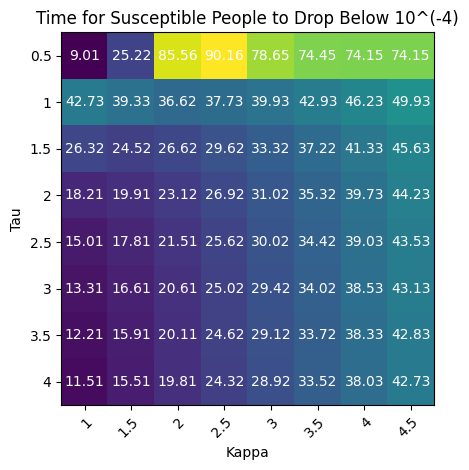

In [ ]:
t_array=np.zeros((8,8))
for i in range(1,9):
  for j in range(2,10):
    tau = i/2
    kappa = j/2
    t_span = (0, 1000)
    t_eval = np.linspace(0, 150, 1500)
    terminate.direction = -1
    terminate.terminal = True
    sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
    t_array[i-1, j-2] = (sol.t[-1])

#print(tau)
#print(kappa)
#print(t_array)
#print(np.shape(t_array))
tau = [0.5,1,1.5,2,2.5,3,3.5,4]
kappa = [1,1.5,2,2.5,3,3.5,4,4.5]
fig, ax = plt.subplots()
test = ax.imshow(t_array)
ax.set_xticks(np.arange(len(kappa)), labels=kappa)
ax.set_yticks(np.arange(len(tau)), labels=tau)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(len(kappa)):
    for j in range(len(tau)):
        text = ax.text(j, i, round(t_array[i, j], 2),
                       ha="center", va="center", color="w")
plt.xlabel("Kappa")
plt.ylabel("Tau")
plt.title("Time for Susceptible People to Drop Below 10^(-4)")
fig.tight_layout()
plt.show()

Kappa is the rate at which infected people recover with a higher number representing a longer recovery period, and tau represents the rate at which the disease spreads with a higher number representing a faster spread. Here we can see the times it takes for the disease to die out based on different kappa and tau values. There is a couple of key takeaways we can draw from this heatmap.
The first is that a very high tau value leads to the disease dying off faster. This makes a lot of sense conceptually as the faster a disease can spread, the faster it can infect all of the susceptible population and then once they have recovered the time will stop.
This leads into the next takeaway which is that the greater the kappa value, the longer the stopping time. Again, this makes a lot of sense because with these high tau values everyone will be getting sick quickly and then must wait until they recover to have the timer stop so having a higher kappa value causes that dying off to take a bit longer.
The interesting part of the graph is at tau = 0.5 and is much harder to interpret as it does not follow the trends of the rest of the graph (I have added in these graphs below for you to look at). The best way that I can explain this is that when kappa is less than 2 and tau = 0.5, the people are recovering too fast for the disease to spread effectively leading to it dying off very fast. Once kappa hits 2, people are staying infected long enough to keep it from dying off too quickly allowing it to spread effectively. The time for the disease to die off starts going back down once kappa is 3 or greater because once the recovery time is slow enough, people are starting to get infected faster meaning the susceptible population goes down quicker and the disease doesnt have enough people to spread to and dies out.

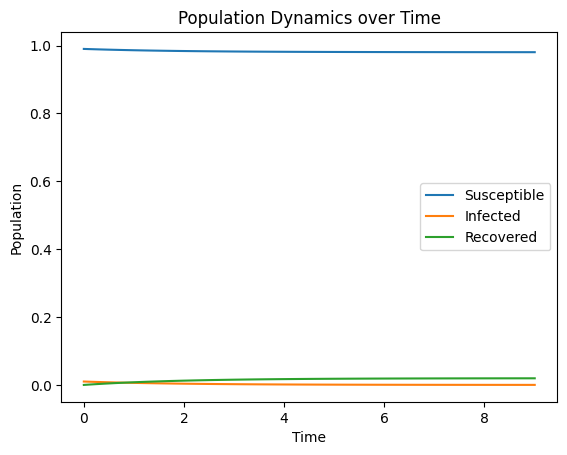

In [ ]:
tau = 0.5
kappa = 1
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

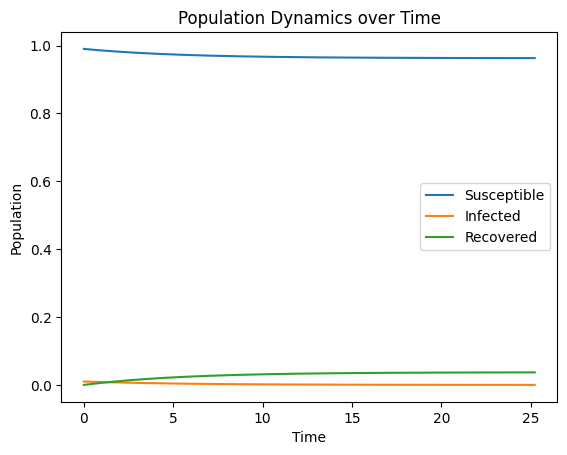

In [ ]:
tau = 0.5
kappa = 1.5
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

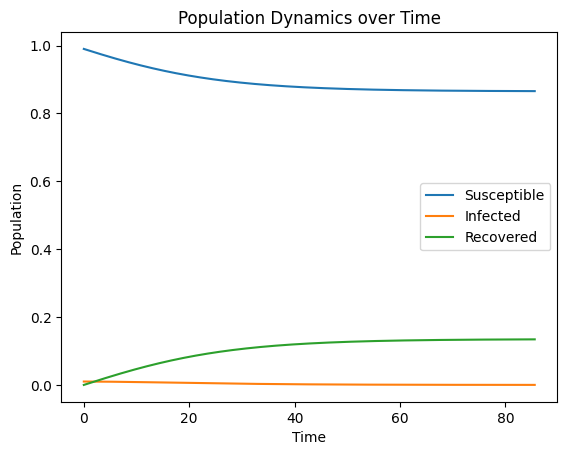

In [ ]:
tau = 0.5
kappa = 2
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

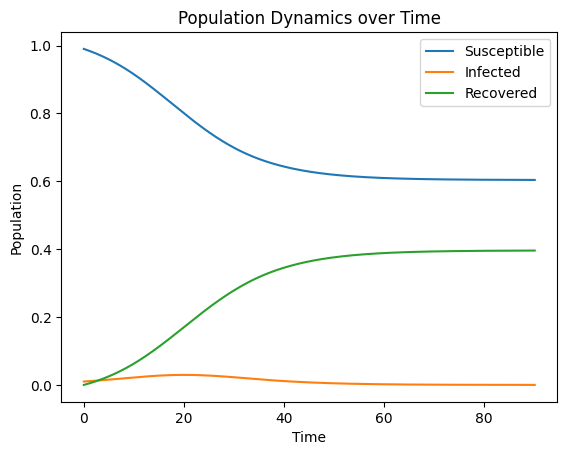

In [ ]:
tau = 0.5
kappa = 2.5
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()

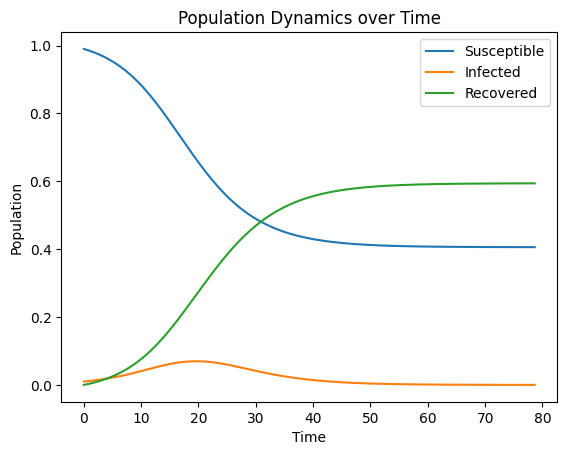

In [ ]:
tau = 0.5
kappa = 3
t_span = (0, 1000)
t_eval = np.linspace(0, 150, 1500)
terminate.direction = -1
terminate.terminal = True
sol = solve_ivp(fun=f, t_span=t_span, t_eval=t_eval, y0=x0, method='RK45', events=terminate)
sol.t[-1]
plt.plot(sol.t, sol.y[0], label='Susceptible')
plt.plot(sol.t, sol.y[1], label='Infected')
plt.plot(sol.t, sol.y[2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics over Time')
plt.legend() # show how the colors correspond to the components of X
plt.show()